In [2]:
#!curl -o winequality.csv https://raw.githubusercontent.com/sumathi16/Machine-Learning-March/master/data/Wine_Quality_Data.csv

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("Data/winequality.csv")

In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data.shape

(6497, 13)

In [6]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [7]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [8]:
data.color.value_counts(normalize=True)

white    0.753886
red      0.246114
Name: color, dtype: float64

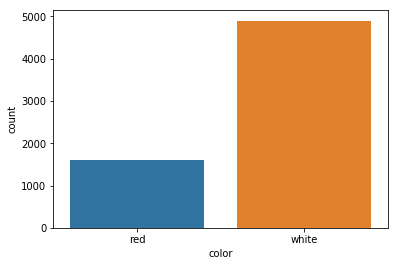

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot("color",data=data)

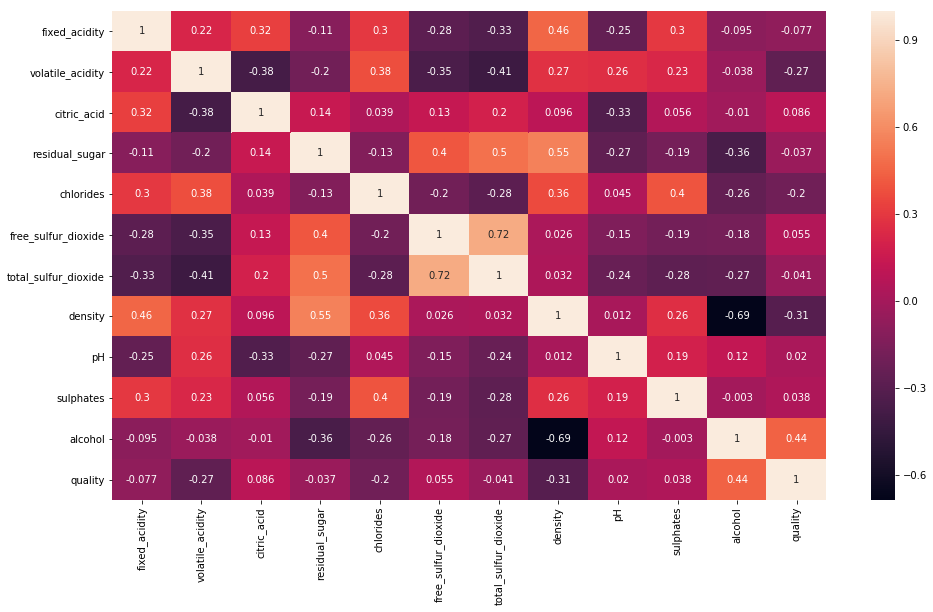

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In [11]:
data.select_dtypes(exclude=object).dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
#data['color'] = data['color'].apply(lambda x:0 if x=='red' else 1)

In [13]:
x = data.drop("color",axis=1)
y = data.color

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4872, 12) (1625, 12) (4872,) (1625,)


In [32]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmean.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1])

In [34]:
kmean.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [35]:
kmean.cluster_centers_

array([[7.60545791e+00, 4.04902868e-01, 2.93635523e-01, 3.13270120e+00,
        6.55689177e-02, 1.86232655e+01, 6.41998150e+01, 9.94527468e-01,
        3.25351989e+00, 5.68538390e-01, 1.08117946e+01, 5.81637373e+00],
       [6.90160517e+00, 2.87317343e-01, 3.39291513e-01, 7.29557196e+00,
        4.85704797e-02, 4.00337638e+01, 1.56743173e+02, 9.94829589e-01,
        3.18997048e+00, 5.00025830e-01, 1.02467700e+01, 5.82177122e+00]])

In [36]:
labels = kmean.predict(x_test)

In [37]:
kmean.inertia_

6590214.107373769

In [50]:
results = pd.DataFrame()
results['original_y'] = y_test
results['predicted_y'] = kmean.predict(x_test)

In [51]:
results

,original_y,predicted_y
1439,red,0
1332,red,0
5672,white,0
5189,white,0
4746,white,1
...,...,...
4640,white,1
2436,white,1
6335,white,0
188,red,1


In [53]:
results.groupby(["original_y","predicted_y"]).predicted_y.count()

original_y  predicted_y
red         0              372
            1               20
white       0              332
            1              901
Name: predicted_y, dtype: int64

In [30]:
ssd = {}
for i in range(2,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x_train)
    ssd[i] = kmean.inertia_

In [31]:
ssd

{2: 6590147.346026065,
 3: 3355155.5951027162,
 4: 2372542.761226726,
 5: 1854690.876510965,
 6: 1589649.8292909171,
 7: 1396875.1706471296,
 8: 1264851.16935441,
 9: 1148658.1993129756,
 10: 1045361.5106040505}

In [22]:
kmean.predict(x_test)

{2: array([1, 1, 1, ..., 1, 0, 0]),
 3: array([1, 0, 1, ..., 0, 1, 2]),
 4: array([1, 2, 1, ..., 2, 0, 3]),
 5: array([1, 3, 4, ..., 1, 4, 0]),
 6: array([4, 1, 0, ..., 4, 3, 2]),
 7: array([3, 1, 3, ..., 6, 2, 4]),
 8: array([3, 1, 3, ..., 6, 4, 5]),
 9: array([5, 4, 0, ..., 2, 3, 1]),
 10: array([1, 3, 2, ..., 9, 6, 8])}

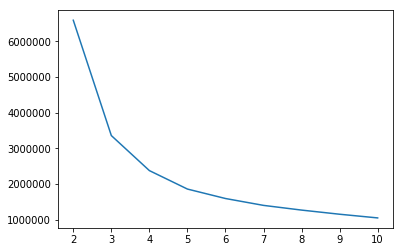

In [323]:
plt.plot(list(ssd.keys()),list(ssd.values()))

In [324]:
results["predicted_y"].value_counts(normalize=True)

1    0.566769
0    0.433231
Name: predicted_y, dtype: float64

In [325]:
km = KMeans(n_clusters=5)
km.fit(x_train)
results["y_pred_clust5"] = km.predict(x_test)

In [326]:
results

,original_y,predicted_y,y_pred_clust5
1439,red,0,1
1332,red,0,2
5672,white,0,3
5189,white,0,3
4746,white,1,0
...,...,...,...
4640,white,1,0
2436,white,1,0
6335,white,0,1
188,red,1,3


In [328]:
results["y_pred_clust5"].value_counts(normalize=True)

3    0.288000
0    0.237538
2    0.184000
1    0.183385
4    0.107077
Name: y_pred_clust5, dtype: float64